In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go


# NOTES
- RHIANNA BUYS ROSES AT THE BOTTOM ON ALL 3 DAYS OF BACKTEST FOR R3 (TRUE SIGNAL)
- Raj and Vinnie Take opposing trade on Coconuts
- Valentina Trades Amethyst & Starfruit Well

In [18]:
trades_1_0 = pd.read_csv("backtest_data/trades_round_1_day_-2_wn.csv", delimiter=';')
trades_1_1 = pd.read_csv("backtest_data/trades_round_1_day_-1_wn.csv", delimiter=';')
trades_1_2 = pd.read_csv("backtest_data/trades_round_1_day_0_wn.csv", delimiter=';')

trades_3_0 = pd.read_csv("backtest_data/trades_round_3_day_0_wn.csv", delimiter=';')
trades_3_1 = pd.read_csv("backtest_data/trades_round_3_day_1_wn.csv", delimiter=';')
trades_3_2 = pd.read_csv("backtest_data/trades_round_3_day_2_wn.csv", delimiter=';')

trades_4_0 = pd.read_csv("backtest_data/trades_round_4_day_1_wn.csv", delimiter=';')
trades_4_1 = pd.read_csv("backtest_data/trades_round_4_day_2_wn.csv", delimiter=';')
trades_4_2 = pd.read_csv("backtest_data/trades_round_4_day_3_wn.csv", delimiter=';')

In [19]:
prices_1_0 = pd.read_csv("backtest_data/prices_round_1_day_-2.csv", delimiter=';')
prices_1_1 = pd.read_csv("backtest_data/prices_round_1_day_-1.csv", delimiter=';')
prices_1_2 = pd.read_csv("backtest_data/prices_round_1_day_0.csv", delimiter=';')

prices_3_0 = pd.read_csv("backtest_data/prices_round_3_day_0.csv", delimiter=';')
prices_3_1 = pd.read_csv("backtest_data/prices_round_3_day_1.csv", delimiter=';')
prices_3_2 = pd.read_csv("backtest_data/prices_round_3_day_2.csv", delimiter=';')

prices_4_0 = pd.read_csv("backtest_data/prices_round_4_day_1.csv", delimiter=';')
prices_4_1 = pd.read_csv("backtest_data/prices_round_4_day_2.csv", delimiter=';')
prices_4_2 = pd.read_csv("backtest_data/prices_round_4_day_3.csv", delimiter=';')

In [86]:
prices_1_1["timestamp"] += 1000000
prices_1_2["timestamp"] += 2000000

prices_3_1["timestamp"] += 1000000
prices_3_2["timestamp"] += 2000000

prices_4_1["timestamp"] += 1000000
prices_4_2["timestamp"] += 2000000

trades_1_1["timestamp"] += 1000000
trades_1_2["timestamp"] += 2000000

trades_3_1["timestamp"] += 1000000
trades_3_2["timestamp"] += 2000000

trades_4_1["timestamp"] += 1000000
trades_4_2["timestamp"] += 2000000


In [20]:
def get_row_by_timestamp(df, timestamp):
    # Ensure the 'timestamp' column is the index if it's not already
    if df.index.name != 'timestamp':
        df = df.set_index('timestamp')
    
    # Lookup the row by timestamp
    try:
        row = df.loc[timestamp]
        return row
    except KeyError:
        # Return None or appropriate error message if timestamp is not found
        return None

In [21]:
def getPNLhistory(trader, rhianna_df, dfprices):
    position = 0
    buy_costs = 0
    sell_profit = 0
    pnls = []
    positions = []


    for row in dfprices.itertuples():
        time = row.timestamp
        trade = get_row_by_timestamp(rhianna_df, time)
        midprice = row.mid_price
        # update
        if trade is not None:
            if isinstance(trade, pd.DataFrame):
                # Handle multiple trades
                for _, single_trade in trade.iterrows():
                    if single_trade.buyer == trader:
                        position += single_trade.quantity
                        buy_costs += single_trade.quantity * single_trade.price

                    elif single_trade.seller == trader:
                        position -= single_trade.quantity
                        sell_profit += single_trade.quantity * single_trade.price

            elif isinstance(trade, pd.Series):
                # Handle a single trade
                if trade.buyer == trader:
                    position += trade.quantity
                    buy_costs += trade.quantity * trade.price

                elif trade.seller == trader:
                    # She sold
                    # She bought
                    position -= trade.quantity
                    sell_profit += trade.quantity * trade.price

        if position > 0: # she long
            pnl = (midprice * position) - buy_costs + sell_profit
        elif position < 0:
            pnl = sell_profit - buy_costs - (midprice * abs(position))
        else:
            pnl = sell_profit - buy_costs
        
        pnls.append(pnl)
        positions.append(position)

    return dfprices['timestamp'], pnls, positions

In [22]:
vipers = ['Valentina', 'Vinnie', 'Vladimir', 'Vivian']
cobras = ['Celeste', 'Colin', 'Carlos', 'Camilla']
pythons = ['Pablo', 'Penelope', 'Percy', 'Petunia']
rattles = ['Remy', 'Rhianna', 'Raj']
anacondas = ['Amelia', 'Adam', 'Alina', 'Amir']

In [98]:
product = 'ROSES' # this is the product u want to check
trader = 'Rhianna' # this is the trader u want to see

# combine all trade data and price data from day 1 into one dataframe
df = pd.concat([trades_3_0, trades_3_1, trades_3_2])
dfprices = pd.concat([prices_3_0, prices_3_1, prices_3_2])

df = df[df['symbol'] == product]
dfprices = dfprices[dfprices['product'] == product]


rhianna_df = df[(df['buyer'] == trader) | (df['seller'] == trader)]

# Use this next sell to visualize who has trades the product you selected on your selected day so you know which traders you can select

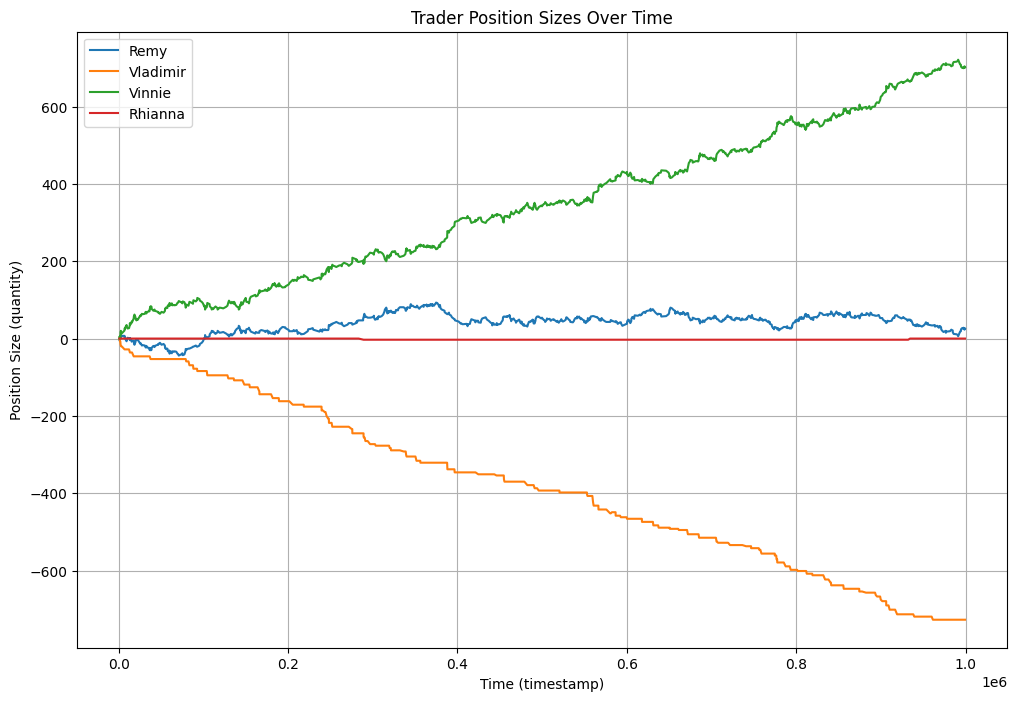

In [75]:
# Track each trader's position
positions = {name: [] for name in set(df['buyer']).union(df['seller'])}
timestamps = []

# Initialize positions at 0
current_positions = {name: 0 for name in positions.keys()}

# Calculate positions over time
for index, row in df.iterrows():
    current_positions[row['buyer']] += row['quantity']
    current_positions[row['seller']] -= row['quantity']
    for trader in positions:
        positions[trader].append(current_positions[trader])
    timestamps.append(row['timestamp'])

# Convert positions data to DataFrame for plotting
position_data = pd.DataFrame(positions, index=timestamps)

# Plotting
plt.figure(figsize=(12, 8))

for trader in positions:
    y = position_data[trader]
    x = position_data.index

    plt.plot(x, y, label=trader)

plt.title('Trader Position Sizes Over Time')
plt.xlabel('Time (timestamp)')
plt.ylabel('Position Size (quantity)')
plt.legend()
plt.grid(True)


#ax2 = plt.twinx()
#ax2.plot(dfprices['timestamp'], dfprices['mid_price'], c='C3')

plt.show()



# Use the following sells to visualize how your trader performs on the day

In [99]:
time, pnl, pos = getPNLhistory(trader, rhianna_df, dfprices)

# PNl tracker

In [100]:
fig = go.Figure()

fig.add_trace(go.Scatter(x=time, y=pnl))

fig.show()

# trade entry tracker

In [101]:
# Filter transactions involving Rhianna
rhianna_df = df[(df['buyer'] == trader) | (df['seller'] == trader)]

# Extract buy and sell events for Rhianna
rhianna_buys = rhianna_df[rhianna_df['buyer'] == trader]['timestamp']
rhianna_sells = rhianna_df[rhianna_df['seller'] == trader]['timestamp']

# Plotly graph setup
fig = go.Figure()

# Plot main price data
fig.add_trace(go.Scatter(x=dfprices['timestamp'], y=dfprices['mid_price'], mode='lines', name='Market Price'))

# Add markers for Rhianna's buys
fig.add_trace(go.Scatter(x=rhianna_buys, y=rhianna_df[rhianna_df['buyer']==trader]['price'],
                         mode='markers', name='Rhianna Buys', marker=dict(color='green', size=10, symbol='triangle-up')))

# Add markers for Rhianna's sells
fig.add_trace(go.Scatter(x=rhianna_sells, y=rhianna_df[rhianna_df['seller']==trader]['price'],
                         mode='markers', name='Rhianna Sells', marker=dict(color='red', size=10, symbol='triangle-down')))

# Update layout for clarity
fig.update_layout(title='Market Prices with Rhianna Buy/Sell Signals',
                  xaxis_title='Time (timestamp)',
                  yaxis_title='Price',
                  legend_title='Legend')

fig.show()

# Graph baskets midprices

fig = go.Figure()

# Plot main price data

baskets_prices_3_0 = prices_3_0[prices_3_0['product'] == 'GIFT_BASKET']
baskets_prices_3_1 = prices_3_1[prices_3_1['product'] == 'GIFT_BASKET']
baskets_prices_3_2 = prices_3_2[prices_3_2['product'] == 'GIFT_BASKET']

fig.add_trace(go.Scatter(x=baskets_prices_3_0['timestamp'], y=baskets_prices_3_0['mid_price'], mode='lines', name='Day 0'))
fig.add_trace(go.Scatter(x=baskets_prices_3_1['timestamp'], y=baskets_prices_3_1['mid_price'], mode='lines', name='Day 1'))
fig.add_trace(go.Scatter(x=baskets_prices_3_2['timestamp'], y=baskets_prices_3_2['mid_price'], mode='lines', name='Day 2'))

fig.update_layout(title='Baskets Midprices Over Time',
                    xaxis_title='Time (timestamp)',
                    yaxis_title='Price',
                    legend_title='Legend')

fig.show()

# Graph STRAWBERRIES midprices

fig = go.Figure()

# Plot main price data

strawberries_prices_3_0 = prices_3_0[prices_3_0['product'] == 'STRAWBERRIES']
strawberries_prices_3_1 = prices_3_1[prices_3_1['product'] == 'STRAWBERRIES']
strawberries_prices_3_2 = prices_3_2[prices_3_2['product'] == 'STRAWBERRIES']

fig.add_trace(go.Scatter(x=strawberries_prices_3_0['timestamp'], y=strawberries_prices_3_0['mid_price'], mode='lines', name='Day 0'))
fig.add_trace(go.Scatter(x=strawberries_prices_3_1['timestamp'], y=strawberries_prices_3_1['mid_price'], mode='lines', name='Day 1'))
fig.add_trace(go.Scatter(x=strawberries_prices_3_2['timestamp'], y=strawberries_prices_3_2['mid_price'], mode='lines', name='Day 2'))

fig.update_layout(title='Strawberries Midprices Over Time',
                    xaxis_title='Time (timestamp)',
                    yaxis_title='Price',
                    legend_title='Legend')

fig.show()

# Graph CHOCOLATE midprices

fig = go.Figure()

# Plot main price data

chocolate_prices_3_0 = prices_3_0[prices_3_0['product'] == 'CHOCOLATE']
chocolate_prices_3_1 = prices_3_1[prices_3_1['product'] == 'CHOCOLATE']
chocolate_prices_3_2 = prices_3_2[prices_3_2['product'] == 'CHOCOLATE']

fig.add_trace(go.Scatter(x=chocolate_prices_3_0['timestamp'], y=chocolate_prices_3_0['mid_price'], mode='lines', name='Day 0'))
fig.add_trace(go.Scatter(x=chocolate_prices_3_1['timestamp'], y=chocolate_prices_3_1['mid_price'], mode='lines', name='Day 1'))
fig.add_trace(go.Scatter(x=chocolate_prices_3_2['timestamp'], y=chocolate_prices_3_2['mid_price'], mode='lines', name='Day 2'))

fig.update_layout(title='Chocolate Midprices Over Time',
                    xaxis_title='Time (timestamp)',
                    yaxis_title='Price',
                    legend_title='Legend')

fig.show()


